In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten, Dense,
    Dropout, BatchNormalization, Input, RandomFlip, RandomRotation
)

In [17]:
dataset = "/mnt/c/Users/Likhith/Desktop/Sign_Language_Predictor/Indian"
set

set

In [18]:

img_width = 64
img_height = 64
batch_size = 16
seed = 123

In [19]:

train_ds = image_dataset_from_directory(
    dataset,
    validation_split = 0.2,
    subset = "training",
    seed = seed,
    image_size = (img_width, img_height),
    batch_size = batch_size

)

validation_ds = image_dataset_from_directory(
    dataset,
    validation_split = 0.2,
    subset = "validation",
    seed = seed,
    image_size = (img_width,img_height),
    batch_size=batch_size

)



print("Classes:", train_ds.class_names)

Found 42745 files belonging to 35 classes.
Using 34196 files for training.
Found 42745 files belonging to 35 classes.
Using 8549 files for validation.
Classes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [20]:
val_batches = tf.data.experimental.cardinality(validation_ds)

val_ds = validation_ds.take(val_batches//2)
test_ds = validation_ds.take(val_batches//2)


In [7]:
model = Sequential([
     Input(shape=(32, 32, 3)),
     Conv2D(1024,(3,3),activation = "relu", padding ="same",),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Conv2D(512,(3,3),activation = "relu", padding ="same",),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Dropout(0.4),
     Conv2D(256,(3,3),activation = "relu",padding ="same"),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Dropout(0.3),
     Conv2D(128,(3,3),activation = "relu",padding ="same"),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Dropout(0.2),
     Conv2D(64,(3,3),activation = "relu",padding ="same"),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Dropout(0.1),
      Conv2D(32,(3,3),activation = "relu",padding ="same"),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Dropout(0.08),
     Flatten(),
     Dense(512,activation ="relu"),
     BatchNormalization(),
     Dropout(0.4),
     Dense(256,activation ="relu"),
     BatchNormalization(),
     Dropout(0.3),
     Dense(128,activation ="relu"),
     BatchNormalization(),
     Dropout(0.2),
     Dense(64,activation ="relu"),
     BatchNormalization(),
     Dropout(0.1),
     Dense(35,activation ="softmax"),
    
])


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15  # Increase epochs for better training on larger images
)


Epoch 1/15


I0000 00:00:1750075214.861573     723 service.cc:152] XLA service 0x75331400d0f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750075214.861618     723 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2025-06-16 12:00:14.958412: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750075215.534772     723 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2138 ━━━━━━━━━━━━━━━━━━━━ 7:36:58 13s/step - accuracy: 0.0000e+00 - loss: 4.2101

I0000 00:00:1750075224.440810     723 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2138/2138 ━━━━━━━━━━━━━━━━━━━━ 145s 62ms/step - accuracy: 0.7895 - loss: 0.8902 - val_accuracy: 0.9945 - val_loss: 0.0139
Epoch 2/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 116s 54ms/step - accuracy: 0.9846 - loss: 0.0527 - val_accuracy: 0.9971 - val_loss: 0.0099
Epoch 3/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 115s 54ms/step - accuracy: 0.9886 - loss: 0.0371 - val_accuracy: 0.9980 - val_loss: 0.0114
Epoch 4/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 116s 54ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9996 - val_loss: 0.0023
Epoch 5/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 116s 54ms/step - accuracy: 0.9893 - loss: 0.0353 - val_accuracy: 0.9991 - val_loss: 0.0019
Epoch 6/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 118s 55ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9958 - val_loss: 0.0128
Epoch 7/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 116s 54ms/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 8/15
2138/2138 ━━━━━━━━━━━━━━━━━━━━ 118s 55ms/step - accuracy: 0.9963 - lo

In [19]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 96, 96, 256)    │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,206,603 (8.42 MB)

 Trainable params: 734,915 (2.80 MB)

 Non-trainable params: 1,856 (7.25 KB)

 Optimizer params: 1,469,832 (5.61 MB)

In [16]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Validation Accuracy: {test_acc:.4f}")

535/535 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9980 - loss: 0.0068
Validation Accuracy: 0.9981


In [25]:
model.save("/mnt/c/Users/Likhith/Desktop/Sign_Language_Predictor/model1.keras")


##### import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

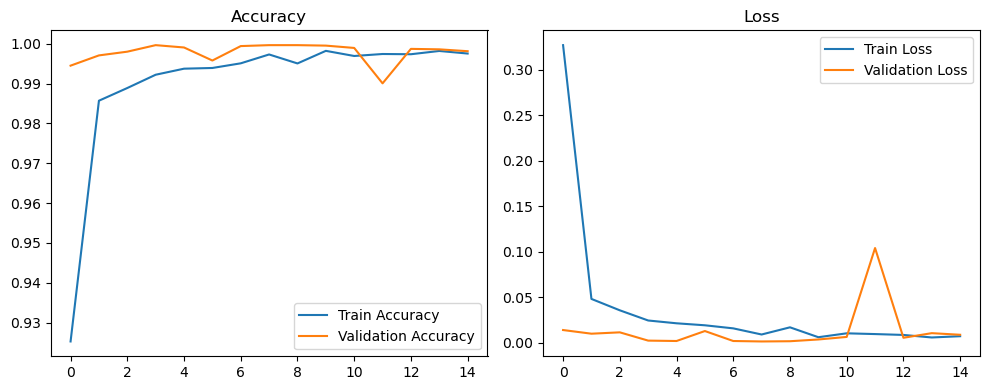

In [31]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted class index: 17
Confidence: 99.98%
Predicted label: A


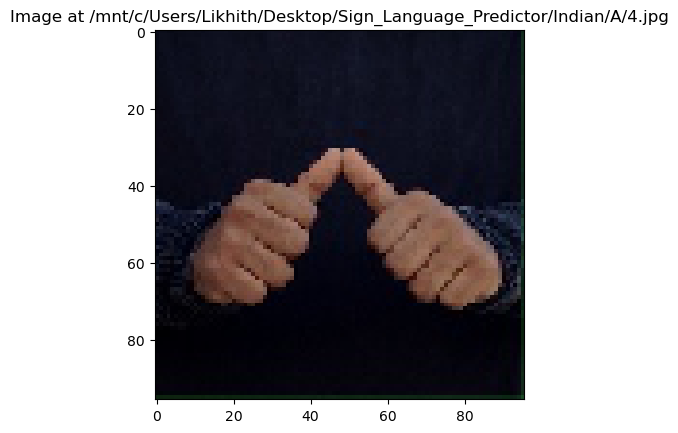

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model





labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
          'V', 'W', 'X', 'Y', 'Z']  

def preprocess_image(img_path, target_size=(96, 96)):
    
    img = image.load_img(img_path, target_size=target_size , color_mode='rgb')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    preds = model.predict(img_array)
    predicted_index = np.argmax(preds[0])
    confidence = preds[0][predicted_index] * 100
    predicted_label1 = labels[predicted_index]
    
    print(f"Predicted class index: {predicted_index}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Predicted label: {predicted_label}")
    return predicted_label, confidence

img_path = "/mnt/c/Users/Likhith/Desktop/Sign_Language_Predictor/Indian/A/4.jpg"
predict_image(img_path)

import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(96, 96))
plt.imshow(img)
plt.title(f"Image at {img_path}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
Predicted class index: 17
Confidence: 99.99%
Predicted label: g


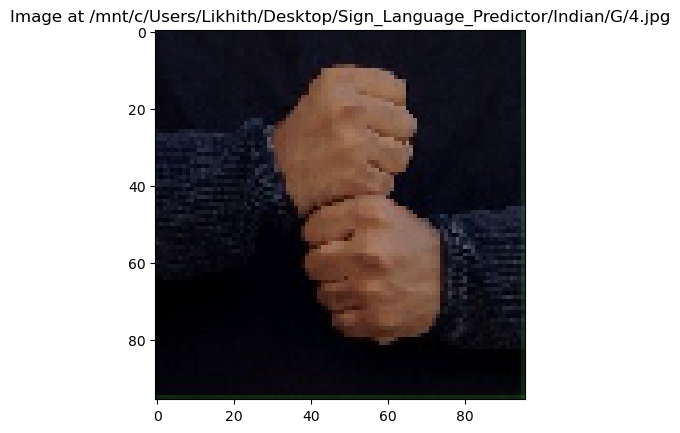

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model



model = load_model("/mnt/c/Users/Likhith/Desktop/Sign_Language_Predictor/model1.keras")

labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U',
          'V', 'W', 'X', 'Y', 'Z']  

def preprocess_image(img_path, target_size=(96, 96)):
    
    img = image.load_img(img_path, target_size=target_size , color_mode='rgb')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    preds = model.predict(img_array)
    predicted_index = np.argmax(preds[0])
    confidence = preds[0][predicted_index] * 100
    predicted_label1 = labels[predicted_index]
    
    print(f"Predicted class index: {predicted_index}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Predicted label: {predicted_label}")
    return predicted_label, confidence

img_path = "/mnt/c/Users/Likhith/Desktop/Sign_Language_Predictor/Indian/G/4.jpg"
predict_image(img_path)

import matplotlib.pyplot as plt
img = image.load_img(img_path, target_size=(96, 96))
plt.imshow(img)
plt.title(f"Image at {img_path}")
plt.show()